<a href="https://colab.research.google.com/github/Nazneen-akram/healthcare-insurance-fraud/blob/main/EDA_healthcare_insurance_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from datetime import datetime
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the datasets
test_beneficiary_data_path = 'Test_Beneficiarydata-1542969243754.csv'
test_inpatient_data_path = 'Test_Inpatientdata-1542969243754.csv'

# Reading the CSV files into pandas dataframes
test_beneficiary_data = pd.read_csv(test_beneficiary_data_path)
test_inpatient_data = pd.read_csv(test_inpatient_data_path)

# Displaying the first few rows of the dataframes
test_beneficiary_data.head()


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,...,2,1,2,1,1,2,0,0,1490,160
2,BENE11010,1936-07-01,NaN,2,1,0,41,30,12,12,...,2,1,1,1,2,2,0,0,1170,660
3,BENE11011,1914-03-01,NaN,2,2,0,1,360,12,12,...,1,1,2,2,1,1,5000,1068,250,320
4,BENE11014,1938-04-01,NaN,2,1,Y,45,780,12,12,...,1,2,1,2,2,2,21260,2136,120,100


In [4]:
test_inpatient_data.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11014,CLM67387,2009-09-09,2009-09-16,PRV57070,9000,PHY317786,PHY427017,NaN,2009-09-09,...,5990,570,41071,4280,4443.0,5849.0,NaN,NaN,NaN,NaN
1,BENE11017,CLM31237,2008-12-25,2009-01-08,PRV54750,14000,PHY314656,PHY426644,NaN,2008-12-25,...,4549,29570,34831,NaN,5551.0,NaN,NaN,NaN,NaN,NaN
2,BENE11026,CLM78930,2009-12-09,2009-12-13,PRV53758,2000,PHY349495,NaN,NaN,2009-12-09,...,78650,7813,4254,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11031,CLM56810,2009-06-23,2009-07-06,PRV55825,16000,PHY429538,PHY371893,NaN,2009-06-23,...,4254,41400,5849,41401,8152.0,3320.0,NaN,NaN,NaN,NaN
4,BENE11085,CLM34625,2009-01-20,2009-01-31,PRV52338,19000,PHY397161,NaN,NaN,2009-01-20,...,V6109,7242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


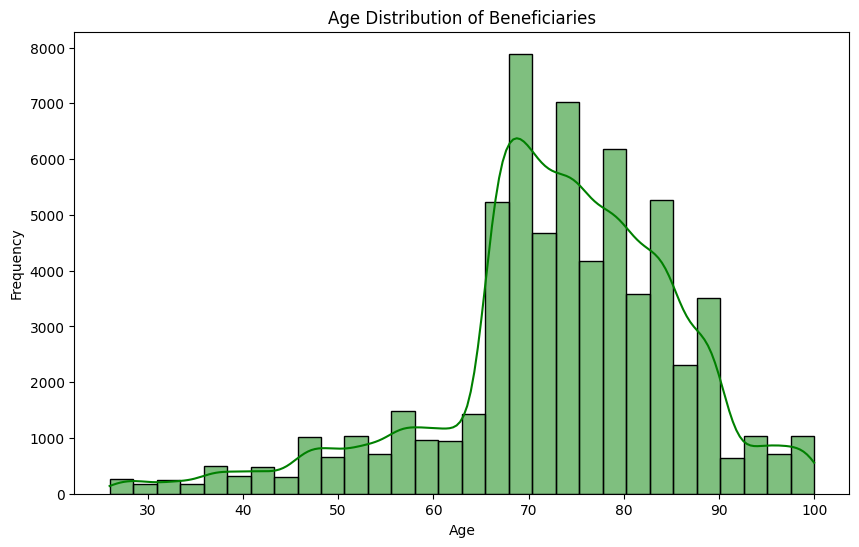

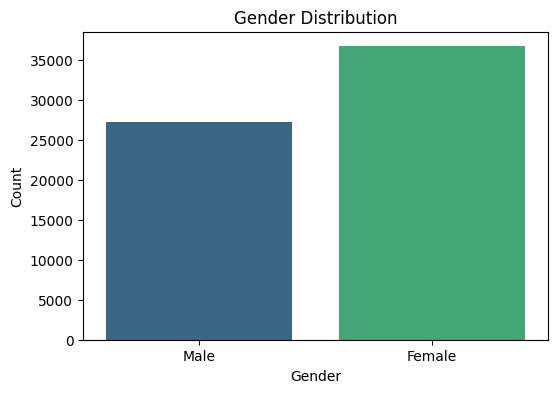

In [46]:
# Function to calculate age
def calculate_age(born, on_date):
    return on_date.year - born.year - ((on_date.month, on_date.day) < (born.month, born.day))

# Convert DOB to datetime
test_beneficiary_data['DOB'] = pd.to_datetime(test_beneficiary_data['DOB'])
# Dataset is from 2009, using a fixed 'current' date for age calculation
current_date = datetime(2009, 12, 31)
test_beneficiary_data['Age'] = test_beneficiary_data['DOB'].apply(lambda x: calculate_age(x, current_date))

# Plotting Age Distribution
plt.figure(figsize=(10,6))
sns.histplot(test_beneficiary_data['Age'], bins=30, kde=True, color='green', edgecolor='black')
plt.title('Age Distribution of Beneficiaries')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Gender Distribution
gender_count = test_beneficiary_data['Gender'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=gender_count.index, y=gender_count.values, palette='viridis')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()

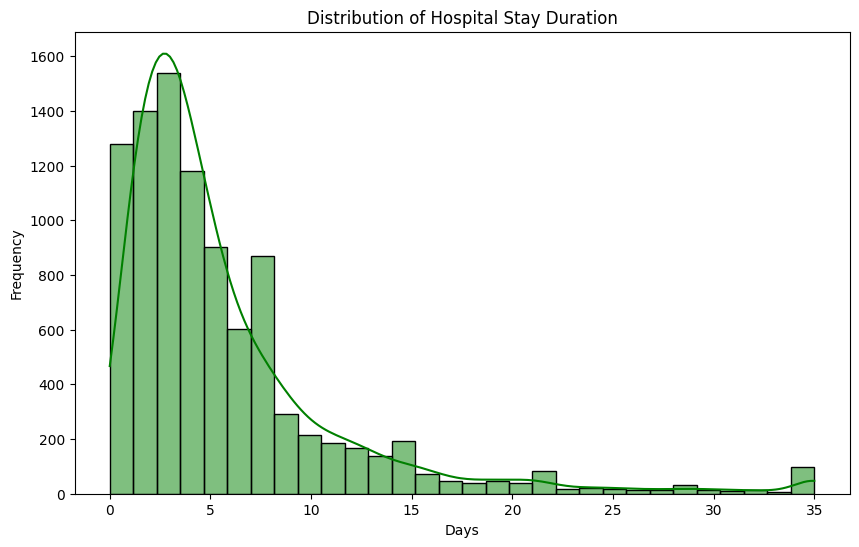

In [30]:
# Convert Admission and Discharge dates to datetime
test_inpatient_data['AdmissionDt'] = pd.to_datetime(test_inpatient_data['AdmissionDt'])
test_inpatient_data['DischargeDt'] = pd.to_datetime(test_inpatient_data['DischargeDt'])

# Calculating Hospital Stay Duration
test_inpatient_data['HospitalStay'] = (test_inpatient_data['DischargeDt'] - test_inpatient_data['AdmissionDt']).dt.days

# Plotting the Distribution of Hospital Stay Duration
plt.figure(figsize=(10,6))
sns.histplot(test_inpatient_data['HospitalStay'], bins=30, kde=True, color='green', edgecolor='black')
plt.title('Distribution of Hospital Stay Duration')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.show()


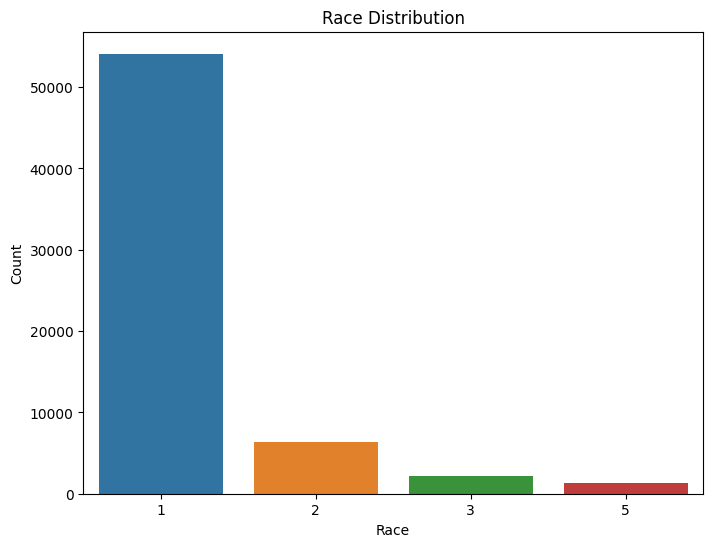

In [44]:
# Race Distribution
race_count = test_beneficiary_data['Race'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=race_count.index, y=race_count.values)
sns.color_palette("pastel")
plt.title('Race Distribution')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()


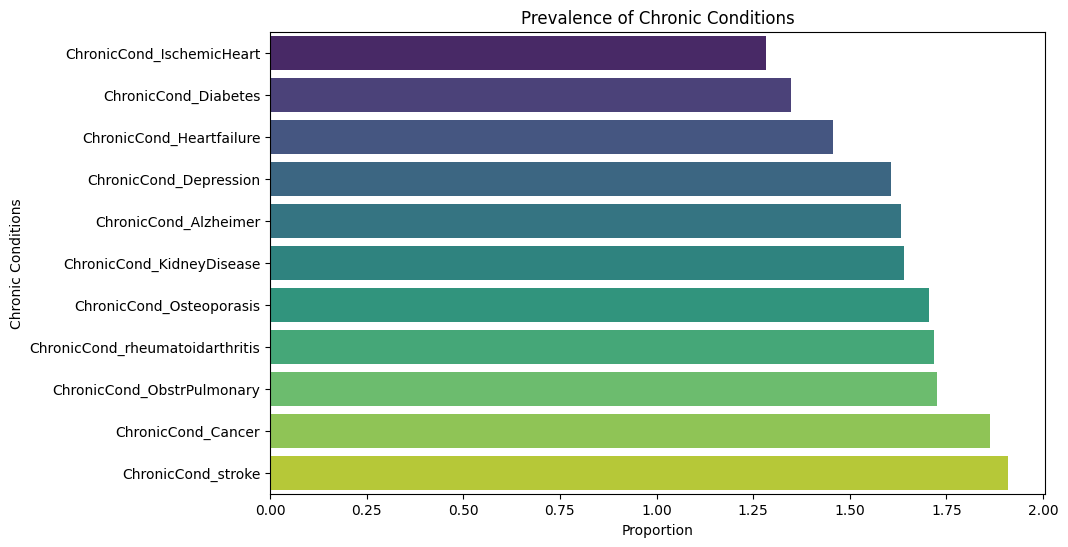

In [52]:
# Chronic Conditions Analysis
chronic_conditions = test_beneficiary_data.filter(regex='ChronicCond_').mean()

# Sorting the chronic conditions data in ascending order before plotting
chronic_conditions_sorted = chronic_conditions.sort_values()

# Plotting the sorted chronic conditions data
plt.figure(figsize=(10,6))
sns.barplot(x=chronic_conditions_sorted.values, y=chronic_conditions_sorted.index, palette='viridis')
plt.title('Prevalence of Chronic Conditions')
plt.xlabel('Proportion')
plt.ylabel('Chronic Conditions')
plt.show()

# First insights from the Beneficiary data

    

> **"age_distribution":** "Age distribution shows a skewed pattern, indicating a higher number of older beneficiaries.",

> **"gender_distribution":** "There is a gender imbalance in the dataset, which needs to be taken into account in further analyses.",

>**"race_distribution":** "The race distribution highlights the diversity (or lack thereof) in the dataset.",

>**"chronic_conditions":** "Certain chronic conditions are more prevalent than others, which could be significant in understanding healthcare needs."    


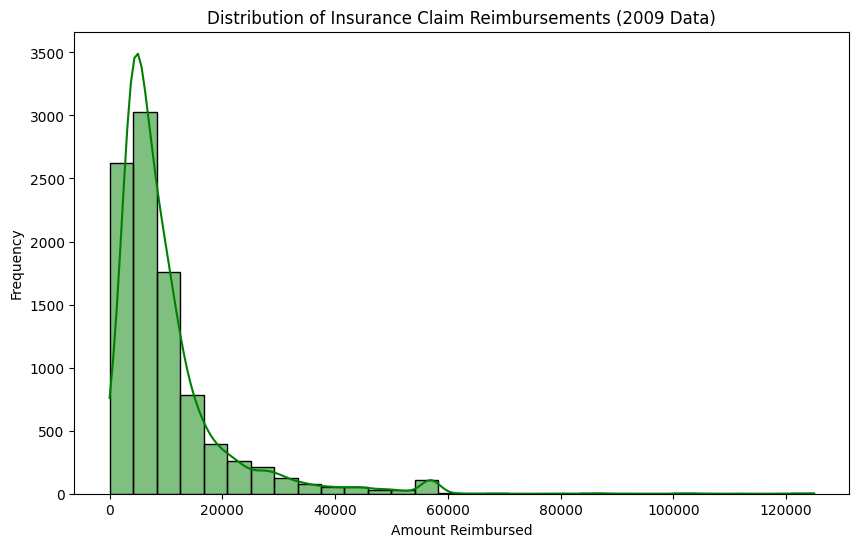

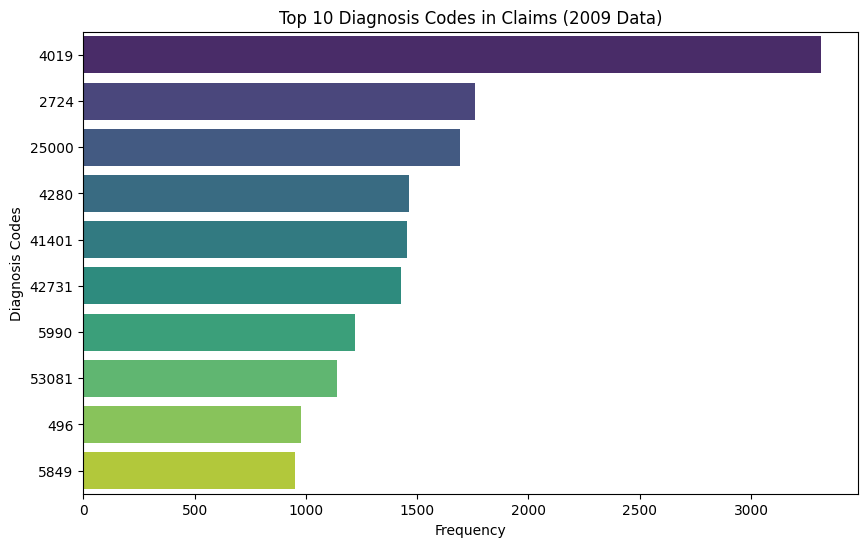

In [51]:

# Re-plotting the Distribution of InscClaimAmtReimbursed for 2009
plt.figure(figsize=(10,6))
sns.histplot(test_inpatient_data['InscClaimAmtReimbursed'], bins=30, kde=True, color='green', edgecolor='black')
plt.title('Distribution of Insurance Claim Reimbursements (2009 Data)')
plt.xlabel('Amount Reimbursed')
plt.ylabel('Frequency')
plt.show()

# Re-analyzing the most common Diagnosis Codes for 2009
top_diagnosis_codes_2009 = test_inpatient_data.filter(regex='ClmDiagnosisCode_').stack().value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(y=top_diagnosis_codes_2009.index, x=top_diagnosis_codes_2009.values, palette='viridis')
plt.title('Top 10 Diagnosis Codes in Claims (2009 Data)')
plt.xlabel('Frequency')
plt.ylabel('Diagnosis Codes')
plt.show()
